In [2]:
import sacpy as scp
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sst = scp.load_sst()["sst"]
ssta = scp.get_anom(sst, method=0)
ssta_djf = scp.XrTools.spec_moth_yrmean(ssta,[12,1,2])

<xarray.DataArray 'sst' ()>
array(1.01669312)


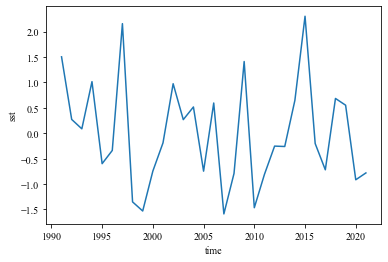

In [4]:
Nino34 = ssta_djf.loc[:, -5:5, 190:240].mean(axis=(1, 2))
print(Nino34.std())
Nino34.plot()

In [5]:
select = Nino34 >= 1
ssta_sl = ssta_djf[select]
mean, pv = scp.one_mean_test(np.array(ssta_sl))

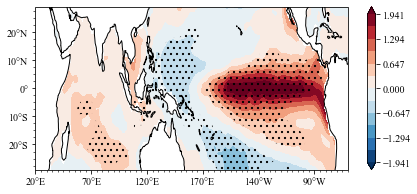

In [6]:
import sacpy.Map
import cartopy.crs as ccrs
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
m = ax.scontourf(lon,lat,mean)
n = ax.sig_plot(lon,lat,pv,color="k",marker="..")
ax.init_map(stepx=50, ysmall=2.5)
plt.colorbar(m)
plt.savefig("../pic/one_test.png")

In [7]:
select1 = (Nino34 >= 0.8) & (Nino34 < 1.1)
ssta_sl1 = ssta_djf[select1]
select2 = Nino34 >= 1.3
ssta_sl2 = ssta_djf[select2]
mean_diff, pv2 = scp.two_mean_test(np.array(ssta_sl2),np.array(ssta_sl1))

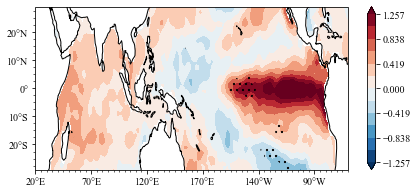

In [8]:
fig = plt.figure(figsize=[7, 3])
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
lon ,lat = np.array(ssta.lon) , np.array(ssta.lat)
m = ax.scontourf(lon,lat,mean_diff)
n = ax.sig_plot(lon,lat,pv2,color="k",marker="..")
ax.init_map(stepx=50, ysmall=2.5)
plt.colorbar(m)
plt.savefig("../pic/two_test.png")